In [3]:
import numpy as np 
import pandas as pd
# from sklearn.tree import DecisionTreeClassifier

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, 
all of whom suffered from the same illness. During their course of treatment,
each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 

Downloading the Data

To download the data, we will use !wget to download it from IBM Object Storag

In [5]:
# !wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Skill

Reading the data in

In [20]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


Let's describe the data frame  and see STD and some count for that 

In [22]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features that we want to use for regression.

In [23]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


so that we can use the info about the data frame to see information about that maybe important 

In [24]:
cdf.info

<bound method DataFrame.info of       ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0            2.0          4                   9.9                  6.7   
1            2.4          4                  11.2                  7.7   
2            1.5          4                   6.0                  5.8   
3            3.5          6                  12.7                  9.1   
4            3.5          6                  12.1                  8.7   
...          ...        ...                   ...                  ...   
1062         3.0          6                  13.4                  9.8   
1063         3.2          6                  13.2                  9.5   
1064         3.0          6                  13.4                  9.8   
1065         3.2          6                  12.9                  9.3   
1066         3.2          6                  14.9                 10.2   

      FUELCONSUMPTION_COMB  CO2EMISSIONS  
0                      8.5          

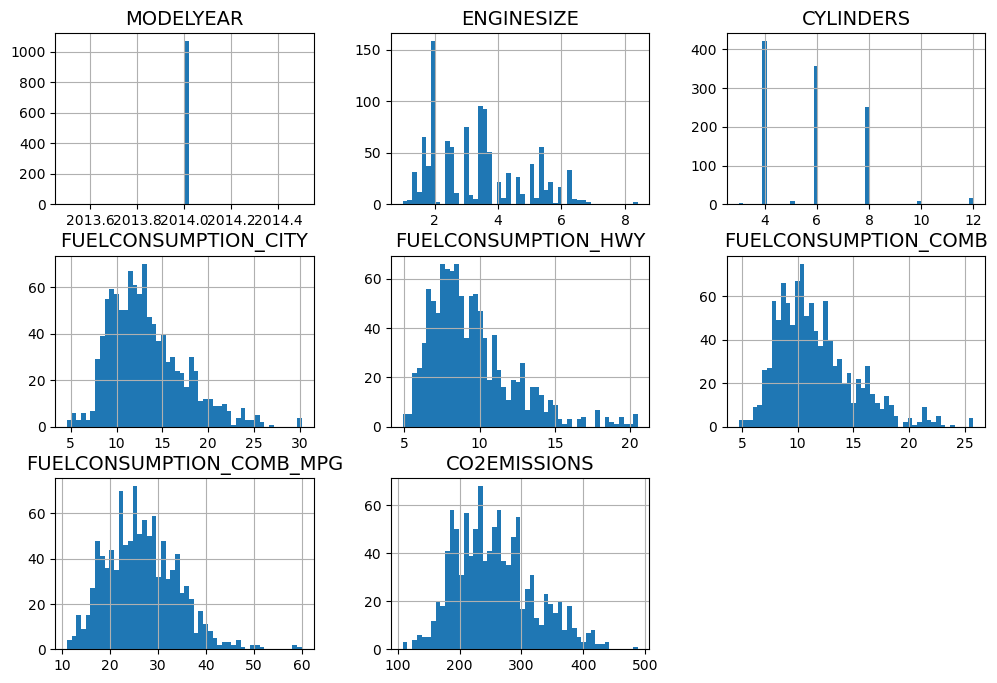

In [26]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
plt.show()

Let's plot Emission values concerning Engine size:
I belive that Emission values concerning Engine size have relation about each other

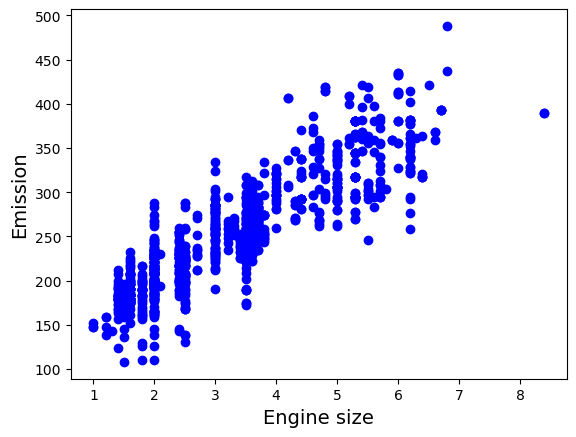

In [27]:
import matplotlib.pyplot as plt 
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

So We can use the crc32 or hash for data because or maybe I had better say it is possible for data it's so large and 
you work on it a lot and you don't wanna make data snooping...
on the other hand, while it doesn't work in this project, I will share

In [32]:
# from zlib import crc32

# def is_id_in_test_set(identifier, test_ratio):
#     return crc32(np.int64(identifier)) < test_ratio * 2**32

# def split_data_with_id_hash(data, test_ratio, id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]

Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive.After which, you train
with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing 
dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model
generalizes on new data.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the np.random.rand() function:

In [28]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Train data distribution

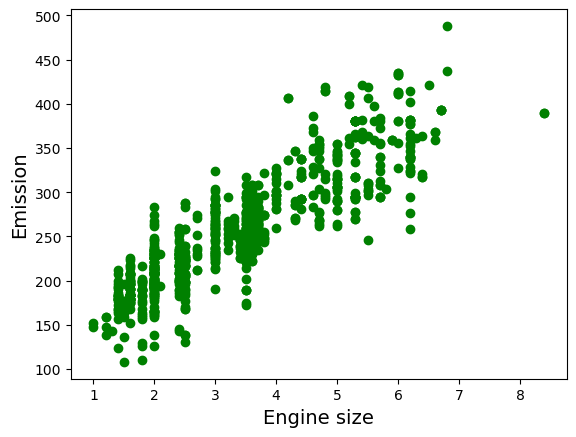

In [46]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

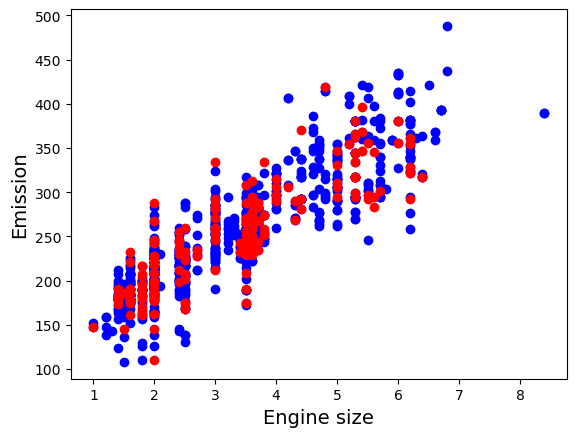

In [45]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Multiple Regression Model

In reality, there are multiple variables that impact the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

In [30]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.66556952  6.58300411  9.95542159]]


In [47]:
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax1.scatter(train['ENGINESIZE'], train['Emission'],  color='blue')
# ax1.scatter(test['ENGINESIZE'], test['Emission'],  color='red')
# plt.xlabel("Engine size")
# plt.ylabel("Emission")
# plt.show()